# Gráficos padronizados em ggplot2
## Bibliotecas
A biblioteca myGraphics.R tem uma rotina loadlibrary que fica responsável por verificar se os pacotes já estão instalados. Se não estiverem, ele faz a instalação. Após a instalação é feito o carregamento da biblioteca.

In [1]:
source("myGraphics.R")
    
loadlibrary("bibtex")
loadlibrary("network")
loadlibrary("RColorBrewer")
loadlibrary("igraph")
loadlibrary("ggplot2")
loadlibrary("gridExtra")
loadlibrary("plyr")
loadlibrary("readr")
loadlibrary("dplyr")
loadlibrary("reshape")
loadlibrary("tm")
loadlibrary("SnowballC")
loadlibrary("wordcloud")
loadlibrary("readxl")
loadlibrary("scales")
loadlibrary("GGally")
loadlibrary("ggthemes")
loadlibrary("repr")

Loading required package: bibtex
Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

Loading required package: RColorBrewer
Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute

The following ob

## Datasets de exemplos
As rotinas a seguir produzem todos os dadasets utilizados nos exemplos deste tutorial.

As entradas para as rotinas gráficas exigem de uma a quatro colunas básicas, que podem ser uma das combinações entre x, variable, value e colors. Obrigatoriamente a variável value deve fazer parte do dataset. 

O exemplo da produção do dataset_stackedbar converte um dataset com múltiplas colunas para o padrão necessário para as funções do GGPlot2 por meio da função melt.

O último dataset produzido é o de cores usando o color brewer.

In [2]:
dataset_series <- function() {
  series <- data.frame(x= 1:10, sin=sin(1:10), cos=cos(1:10))
  series <- melt(series[,c('x','sin','cos')],id.vars = 1)
  return(series)  
}
mydataseries <- dataset_series()

dataset_bar <- function() {
  series <- matrix(nrow=5, ncol=2)
  series[1,] = c("janeiro", 10)
  series[2,] = c("fevereiro", 9)
  series[3,] = c("março", 11)
  series[4,] = c("abril", 8)
  series[5,] = c("maio", 12)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}
mydatabar <- dataset_bar()

dataset_stackedbar <- function() {
  series <- read.table(text = "x Map Reduce 
                          janeiro 10 5
                          fevereiro 9 4
                          março 11 5
                          abril 8 4
                          maio 12 6",header = TRUE,sep = "")  
  series <- melt(series[,c('x','Map','Reduce')],id.vars = 1)
}
mydatastackedbar <- dataset_stackedbar()

con <- url("https://github.com/eogasawara/mylibrary/raw/master/meses.RData")
load(con)

mynorm <- data.frame(value=rnorm(10000))

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

## Plotagem de gráficos de linhas

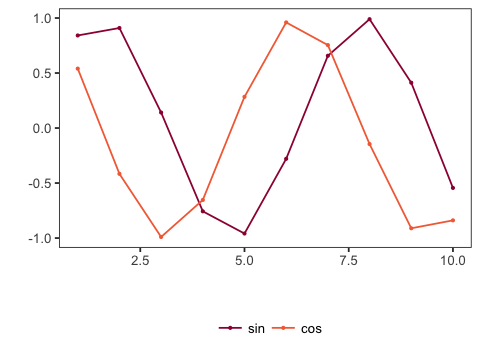

In [3]:
grfs <- plot.series(mydataseries,colors=mycolors)
options(repr.plot.width=4, repr.plot.height=3)
plot(grfs)

## Plotagem de gráficos de barra

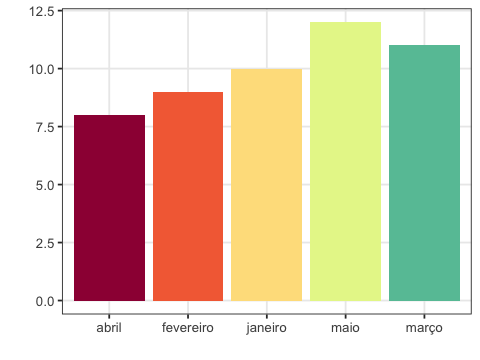

In [4]:
grf <- plot.bar(mydatabar, colors=mycolors)
options(repr.plot.width=4, repr.plot.height=3)
plot(grf)

## Plotagem de gráficos de stacked-bar

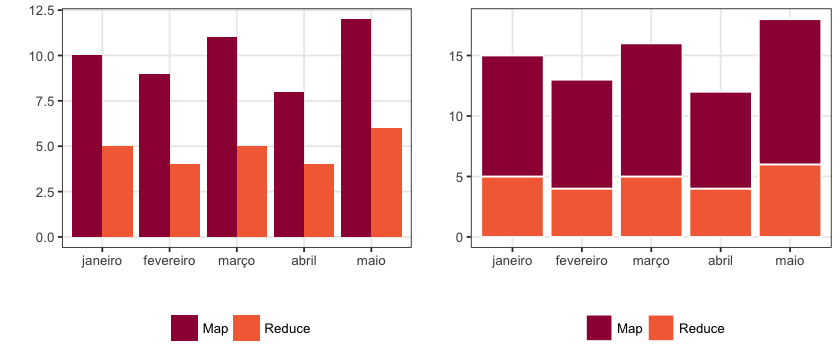

In [5]:
grfb <- plot.bar(mydatastackedbar, group=TRUE, colors=mycolors)
grfsb <- plot.stackedbar(mydatastackedbar, colors=mycolors)

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfb, grfsb, ncol=2)

## Plotagem de barra agrupados

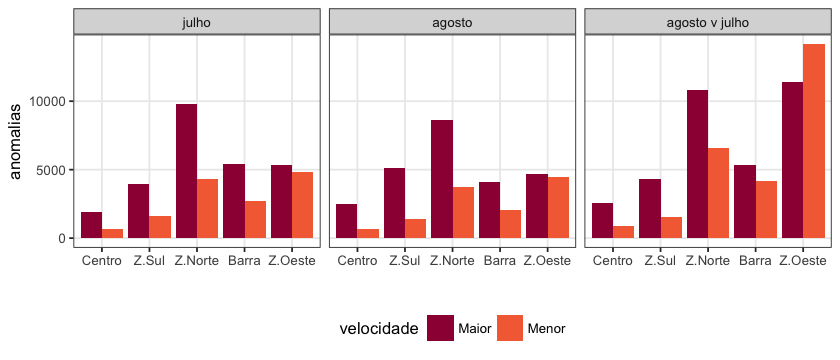

In [6]:
grfa <- plot.bar(meses, group=TRUE, colors=mycolors)
grfa <- grfa + xlab("")
grfa <- grfa + guides(fill=guide_legend(title="velocidade"))
grfa <- grfa + ylab("anomalias")
grfa <- grfa + facet_wrap(~face, ncol = 3) 

options(repr.plot.width=7, repr.plot.height=3)
plot(grfa)

## Plotagem de gráfico de pizza

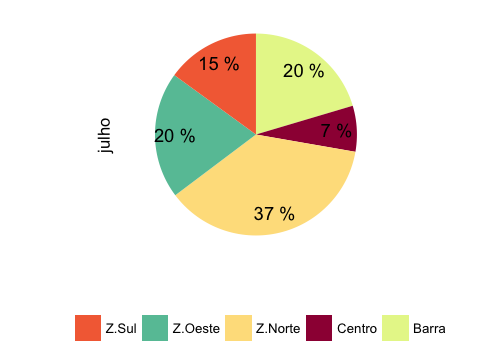

In [7]:
mymeses <- filter(meses, (face == "julho") & (variable == "Maior"))[, c("x", "value")]
names(mymeses) <- c("variable", "value")
mymeses$colors <- mycolors
mymeses <- prepare.pieplot(mymeses)
grfpie <- plot.pieplot(mymeses, label_x = "julho", colors=as.character(mymeses$colors))

options(repr.plot.width=4, repr.plot.height=3)
plot(grfpie)

## Plotagem de gráfico de densidade

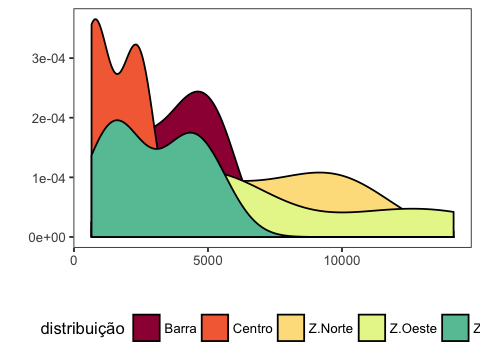

In [8]:
series <- data.frame(variable=meses$x, value=meses$value)
grfgd <- plot.density(series, label_series = "distribuição", colors=mycolors)
options(repr.plot.width=4, repr.plot.height=3)
plot(grfgd)

## Plotagem de histogramas

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


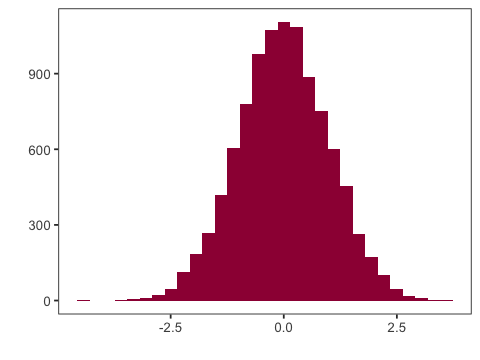

In [9]:
grfgh <- plot.hist(mynorm, label_series = "distribuição", colors=mycolors[1])
options(repr.plot.width=4, repr.plot.height=3)
plot(grfgh)


Plotagem de box-plot

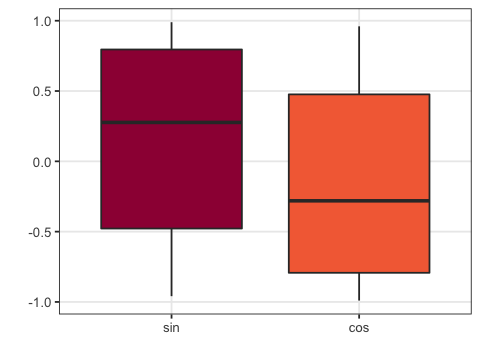

In [10]:
grfb <- plot.boxplot(mydataseries, colors=mycolors[1:2])
options(repr.plot.width=4, repr.plot.height=3)
plot(grfb)


## Produção direta de PDF a partir dos gráficos

In [11]:
pdf("myplot.pdf", width=7, height=3)
plot(grfa)
dev.off()



pdf 
  2